In [92]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
df =  pd.read_excel('/Users/aidanastridge/Documents/Income.xlsx')

In [ ]:
mod = smf.ols(formula='EconFamily_TO ~ Year', data=df)
res = mod.fit()
res.fittedvalues

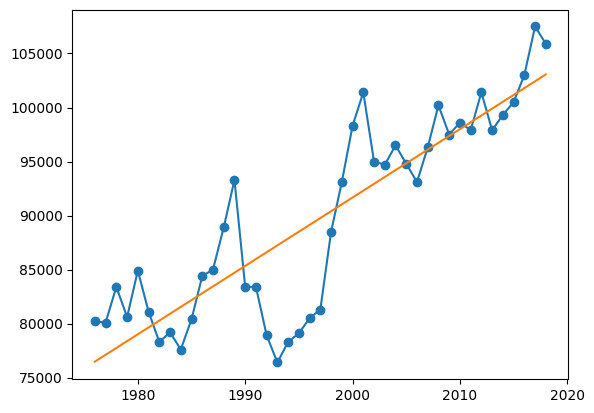

In [70]:
plt.plot(df['Year'].astype(float),df['EconFamily_TO'])
plt.scatter(df['Year'],df['EconFamily_TO'])
plt.plot(df['Year'], res.fittedvalues)


In [103]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          EconFamily_TO   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.87e-13
Time:                        15:21:53   Log-Likelihood:                -424.54
No. Observations:                  43   AIC:                             853.1
Df Residuals:                      41   BIC:                             856.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.174e+06   1.18e+05     -9.952      0.000   -1.41e+06   -9.36e+05
Year         632.8904     59.076     10.713      0.000     513.584     752.196
==============================================================================
Omnibus:                        2.500   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.934
Skew:                          -0.519   Prob(JB):                        0.380
Kurtosis:                       3.014   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Positive autocorrelation

In [99]:
mod2 = smf.ols(formula='EconFamily_TO ~ Year + I(Year**2)', data=df)
res2 = mod2.fit()

In [100]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          EconFamily_TO   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     68.18
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.30e-13
Time:                        15:20:06   Log-Likelihood:                -421.34
No. Observations:                  43   AIC:                             848.7
Df Residuals:                      40   BIC:                             854.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.941e+07      2e+07      2.475      0.018    9.06e+06    8.98e+07
Year         -5.003e+04      2e+04     -2.502      0.017   -9.04e+04   -9621.397
I(Year ** 2)    12.6850      5.006      2.534      0.015       2.567      22.803
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.382
Skew:                           0.205   Prob(JB):                        0.826
Kurtosis:                       3.213   Cond. No.                     1.16e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Positive autocorrelation with quadratic detrending

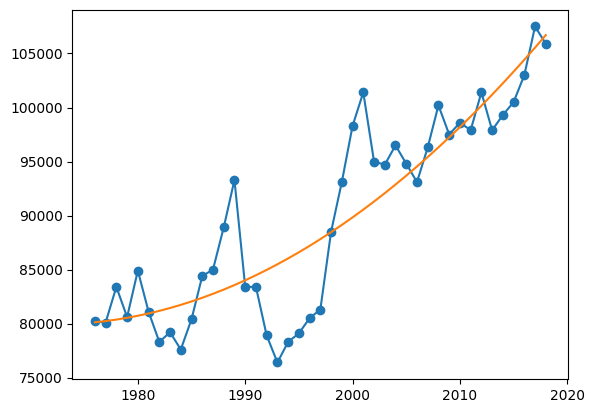

In [102]:
plt.plot(df['Year'].astype(float),df['EconFamily_TO'])
plt.scatter(df['Year'],df['EconFamily_TO'])
plt.plot(df['Year'], res2.fittedvalues)

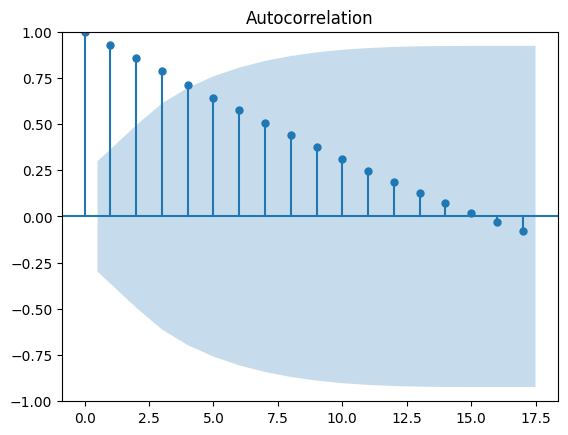

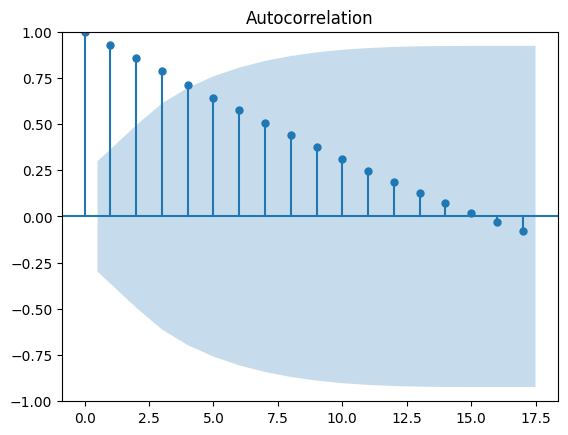

In [104]:
plot_acf(res2.fittedvalues)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


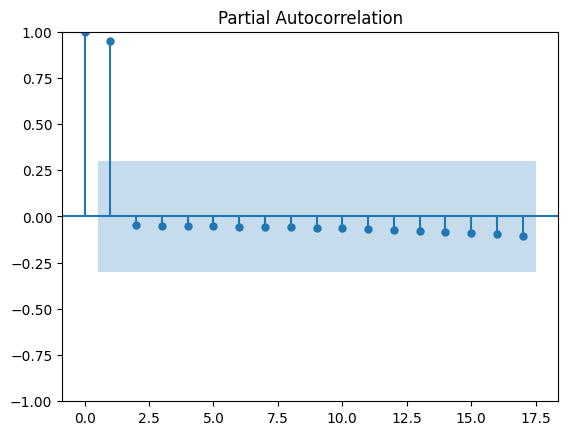

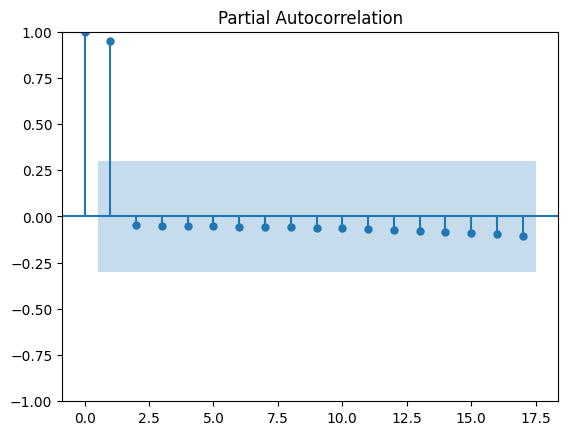

In [105]:
plot_pacf(res2.fittedvalues)

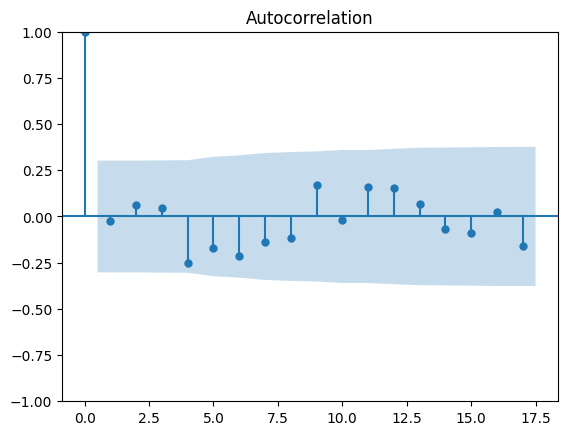

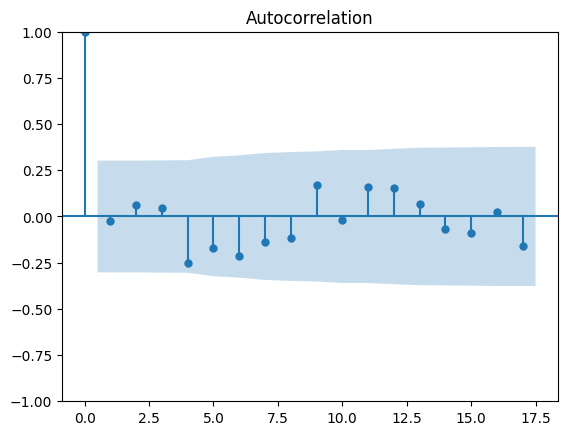

In [91]:
plot_acf(df['EconFamily_TO'].diff()[1:])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


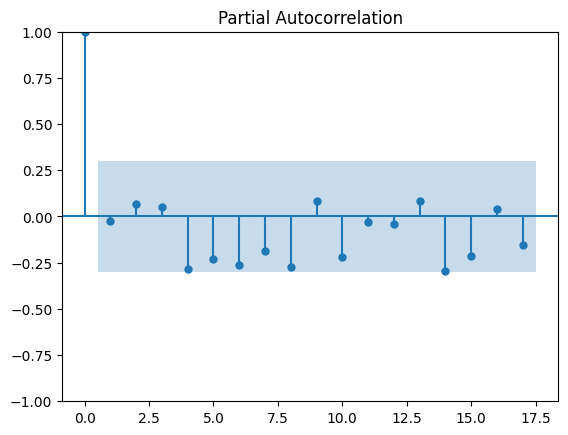

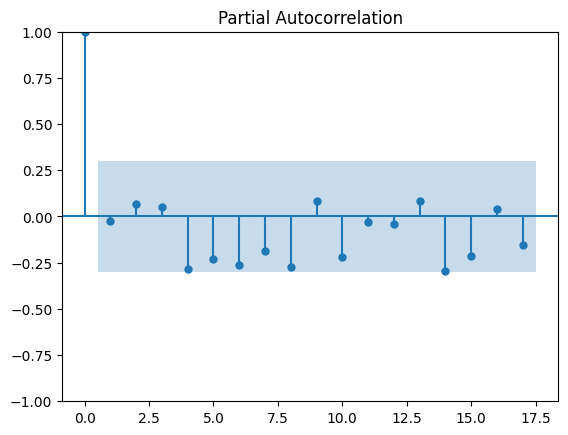

In [89]:
plot_pacf(df['EconFamily_TO'].diff()[1:])

Stationary after 1st order differencing